# Kaggle 데이터를 Colab에서 다운로드하기 위해 Kaggle API 키를 설정합니다.

In [ ]:
import kagglehub

In [ ]:
# kaggle 파일 연결
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hannkh","key":"af98daa5680256e446f9b23f6cc39f53"}'}

In [ ]:
# kaggle API 설정

# kaggle.json -> .kaggle 폴더로 이동
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# 권한 설정(읽기만 가능)
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!ls

kaggle.json  sample_data


In [ ]:
!kaggle competitions download -c ai03-level1-project

100% 3.91G/3.91G [02:08<00:00, 29.8MB/s]
100% 3.91G/3.91G [02:08<00:00, 32.8MB/s]


In [ ]:
!ls

ai03-level1-project.zip  kaggle.json  sample_data


In [ ]:
# 파일 압축해제
!unzip -q ai03-level1-project.zip

In [ ]:
# matplotlib 캐시 폴더 삭제(자동으로 재성성됨)
import os
import shutil
import matplotlib

cache_dir = matplotlib.get_cachedir()
shutil.rmtree(cache_dir)
print("matplotlib 캐시 삭제 완료 : ", cache_dir)

FileNotFoundError: [Errno 2] No such file or directory: '/root/.cache/matplotlib'

In [ ]:
# 한글폰트 사용 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore')

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)

fm.fontManager.addfont(path)



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.font_manager as fm
for f in fm.findSystemFonts():
    if 'Nanum' in f:
        print(f)

/usr/share/fonts/truetype/nanum/NanumSquare_acB.ttf
/usr/share/fonts/truetype/nanum/NanumSquareB.ttf
/usr/share/fonts/truetype/nanum/NanumSquare_acEB.ttf
/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
/usr/share/fonts/truetype/nanum/NanumSquareL.ttf
/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf
/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf
/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf
/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoR.ttf
/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf
/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
/usr/share/fonts/truetype/nanum/NanumGothic.ttf
/usr/share/fonts/truetype/nanum/NanumMyeongjo-YetHangul.ttf
/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf
/usr/share/fonts/truetype/nanum/NanumBarunGothic-YetHangul.ttf
/usr/share/fonts/truetype/nanum/NanumBrush.ttf
/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf
/usr/share/fonts/t

# BB박스 시각화 & 데이터 확인

In [ ]:
import os
import json
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np

In [ ]:
# device 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

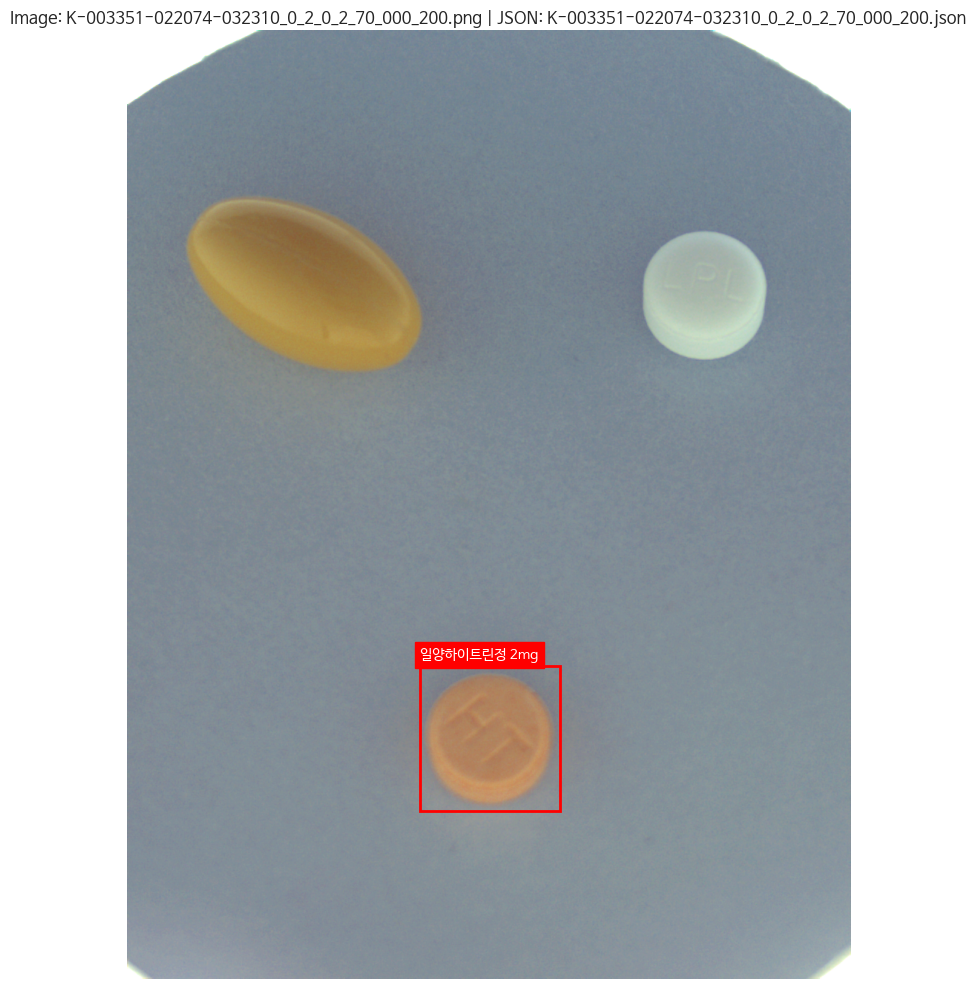

In [ ]:
# 랜덤으로 이미지 추출하기

import os
import json
import random
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 디렉토리 설정
annotation_root = '/content/train_annotations'
image_root = '/content/train_images'

# 1. 모든 하위 json 파일 찾기 (재귀 탐색)
all_json_paths = []
for root, dirs, files in os.walk(annotation_root):
    for file in files:
        if file.endswith('.json'):
            all_json_paths.append(os.path.join(root, file))

if not all_json_paths:
    raise FileNotFoundError(".json 어노테이션 파일을 찾을 수 없습니다.")

# 2. 랜덤하게 하나 선택
chosen_json_path = random.choice(all_json_paths)

# 3. JSON 로드
with open(chosen_json_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

# 4. 카테고리 및 이미지 정보 추출
categories = {cat['id']: cat['name'] for cat in data['categories']}
images = data['images']
annotations = data['annotations']

# 5. 이미지 랜덤 선택
random_img_info = random.choice(images)
image_id = random_img_info['id']
image_filename = random_img_info['file_name']
image_path = os.path.join(image_root, image_filename)

# 6. 이미지 열기
image = Image.open(image_path)

# 7. 시각화
fig, ax = plt.subplots(1, figsize=(8, 10))
ax.imshow(image)
ax.set_title(f"Image: {image_filename} | JSON: {os.path.basename(chosen_json_path)}")

# 8. 해당 image_id의 bbox만 시각화
for ann in annotations:
    if ann['image_id'] != image_id:
        continue

    x, y, w, h = ann['bbox']
    category_id = ann['category_id']
    label = categories.get(category_id, f"id:{category_id}")

    rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect)
    ax.text(x, y - 10, label, fontsize=10, color='white', backgroundcolor='red')

plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# json content structure 확인

import json
import os
import random

annotation_root = '/content/train_annotations'

all_json_paths = []
for root, dirs, files in os.walk(annotation_root):
    for file in files:
        if file.endswith('.json'):
            all_json_paths.append(os.path.join(root, file))

if not all_json_paths:
    raise FileNotFoundError(".json 어노테이션 파일을 찾을 수 없음")

chosen_json_path = random.choice(all_json_paths)


# JSON 불러오기
with open(chosen_json_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

print(f"\n JSON 파일 경로: {chosen_json_path}")
print("JSON 최상위 키 목록:", list(data.keys()))
print("────────────────────────────────────────────")

# 각 키에 대해 요약 출력
for key in data:
    value = data[key]
    print(f"Key: '{key}'")
    print(f"   - 타입: {type(value).__name__}")

    # 리스트형이면 길이, 첫 요소 프린트
    if isinstance(value, list):
        print(f"   - 항목 수: {len(value)}")
        if len(value) > 0:
            print(f"   - 첫 항목 예시:\n     {json.dumps(value[0], indent=4)[:500]}...")
    elif isinstance(value, dict):
        print(f"   - 하위 키 수: {len(value.keys())}")
        print(f"   - 일부 내용:\n     {json.dumps(dict(list(value.items())[:3]), indent=4)}")
    else:
        print(f"   - 값: {value}")

    print("────────────────────────────────────────────")



 JSON 파일 경로: /content/train_annotations/K-003544-010221-016551-029345_json/K-029345/K-003544-010221-016551-029345_0_2_0_2_70_000_200.json
JSON 최상위 키 목록: ['images', 'type', 'annotations', 'categories']
────────────────────────────────────────────
Key: 'images'
   - 타입: list
   - 항목 수: 1
   - 첫 항목 예시:
     {
    "file_name": "K-003544-010221-016551-029345_0_2_0_2_70_000_200.png",
    "width": 976,
    "height": 1280,
    "imgfile": "K-003544-010221-016551-029345_0_2_0_2_70_000_200.png",
    "drug_N": "K-029345",
    "drug_S": "\uc815\uc0c1\uc54c\uc57d",
    "back_color": "\uc5f0\ud68c\uc0c9 \ubc30\uacbd",
    "drug_dir": "\uc55e\uba74",
    "light_color": "\uc8fc\ubc31\uc0c9",
    "camera_la": 70,
    "camera_lo": 0,
    "size": 200,
    "dl_idx": "29344",
    "dl_mapping_code": "K-029345",
    "d...
────────────────────────────────────────────
Key: 'type'
   - 타입: str
   - 값: instances
────────────────────────────────────────────
Key: 'annotations'
   - 타입: list
   - 항목 수: 1
   - 첫 항목 

In [ ]:
# 각 데이터셋 이미지 크기 & 개수 추출

import os
import numpy as np
from PIL import Image

# 이미지 경로 설정
train_dir = '/content/train_images'
test_dir = '/content/test_images'
train_annotation_dir = '/content/train_annotations' # 어노테이션  폴더 경로

# 이미지 크기&개수 추출 함수
def get_image_info(image_dir):
    sizes = []
    total = 0
    for fname in os.listdir(image_dir):
        if fname.endswith('.png'):
            path = os.path.join(image_dir, fname)
            try:
                with Image.open(path) as img:
                    sizes.append(img.size[::-1])    # (height, width) 형태로 저장
                    total += 1
            except:
                print(f"이미지 열기 실패: {fname}")
    if sizes:
        unique_sizes = np.unique(sizes, axis=0)
    else:
        unique_sizes = np.array([])

    return total, unique_sizes

# 어노테이션(json) 개수 추출함수
def count_json_files(json_dir):
    return len([f for f in os.listdir(json_dir) if f.endswith('_json')])

# 이미지 정보 추출
train_total, train_sizes = get_image_info(train_dir)
test_total, test_sizes = get_image_info(test_dir)

# 어노테이션 개수 추출
json_count = count_json_files(train_annotation_dir)

# 출력
print(f"Total images in train: {train_total}")
print("Unique sizes in train:\n", train_sizes)

print(f"\nTotal images in test: {test_total}")
print("Unique sizes in test:\n", test_sizes)

print(f"\nTotal JSON files in train annotation folder: {json_count}")

Total images in train: 1489
Unique sizes in train:
 [[1280  976]]

Total images in test: 843
Unique sizes in test:
 [[1280  976]]

Total JSON files in train annotation folder: 498


#### 정리
- 모든 이미지가 동일한 크기 1280 x 976 사이즈로 정리 됨
- 크기가 통일되어 있어서 모델 학습 시 리사이즈 없이 바로 사용 가능
- 일부 annotation 파일 누락

# 이미지 전처리

## 누락된 이미지에 해당하는 주석(json) 파일 제거

In [ ]:
import os
import json

# 경로 설정
annotation_root = 'train_annotations'
image_dir = 'train_images'

# 누락된 이미지 목록 저장
missing = []

# 모든 주석 폴더 순회
for folder1 in os.listdir(annotation_root):
    folder1_path = os.path.join(annotation_root, folder1)
    if not os.path.isdir(folder1_path):
        continue

    for folder2 in os.listdir(folder1_path):
        folder2_path = os.path.join(folder1_path, folder2)
        if not os.path.isdir(folder2_path):
            continue

        for filename in os.listdir(folder2_path):
            if filename.endswith('.json'):
                json_path = os.path.join(folder2_path, filename)

                try:
                    with open(json_path, 'r', encoding='utf-8') as f:
                        data = json.load(f)

                    # 해당 json 안에 있는 이미지 파일 이름 가져오기
                    img_file = data['images'][0]['file_name']
                    img_path = os.path.join(image_dir, img_file)

                    if not os.path.isfile(img_path):
                        missing.append({
                            'json_path': json_path,
                            'missing_image': img_file
                        })

                except Exception as e:
                    print(f"[ERROR] {json_path}: {e}")

# 결과 출력
print(f"누락된 이미지에 해당하는 주석 파일 수: {len(missing)}")
print("예시:")
for m in missing[:5]:
    print(f" - {m['missing_image']} (in {m['json_path']})")

누락된 이미지에 해당하는 주석 파일 수: 0
예시:


In [ ]:
print(f"[CHECK] file_name: {img_file}")
print(f"[CHECK] img_path: {img_path}")
print(f"[CHECK] exists: {os.path.isfile(img_path)}")

[CHECK] file_name: K-002483-005094-006192-022362_0_2_0_2_90_000_200.png
[CHECK] img_path: train_images/K-002483-005094-006192-022362_0_2_0_2_90_000_200.png
[CHECK] exists: True


In [ ]:
import os
from PIL import Image

image_dir = 'train_images'
all_files = os.listdir(image_dir)

broken_files = []
for fname in all_files:
    if not fname.endswith('.png'):
        continue
    fpath = os.path.join(image_dir, fname)
    try:
        img = Image.open(fpath)
        img.verify()  # 손상된 이미지 확인용
    except Exception as e:
        broken_files.append(fname)
        print(f"[BROKEN] {fname}: {e}")

print(f"총 손상된 이미지 수: {len(broken_files)}")


총 손상된 이미지 수: 0


## COCO 포맷 통합 생성

- 여러 개의 JSON 파일(알약 이미지 annotation)을 COCO 포맷 하나의 .json 파일로 통합

-----------------------
🧩 1. COCO 포맷 구조 설명

| Key | 설명 |
| --- | --- |
| `images` | 이미지 정보 (id, file_name, width, height 등) |
| `annotations` | 바운딩박스 정보 (image_id, bbox, category_id, annotation_id 등) |
| `categories` | 클래스 정보 (id, name 등) |

### 사전 설정 : json 파일을 coco 형식 json으로 변환

#### 틀린코드(아래 디버깅)

In [ ]:
# import os
# import json
# from tqdm import tqdm


# # 경로 설정
# annotation_root = 'train_annotations'           # 알약 정보가 들어있는 JSON 파일들이 있는 상위 폴더
# image_dir = 'train_images'                      # 이미지 파일들일 들어있는 폴더
# output_json_path = 'train_merge_coco.json'      # 최종으로 만들 COCO 형식 JSON 파일 이름


# # COCO 형식 템플릿      # COCO 포맷의 기본 뼈대를 만듦
# coco = {
#     "images": [],       # 이미지 정보가 들어갈 리스트 (파일명, 크기 등)
#     "annotations": [],  # 객체 정보가 들어갈 리스트 (bbox 등)
#     "categories": []    # 클래스 정보 (알약 이름과 번호 매핑 정보)
# }


# # 카테고리 매핑용 : 클래스 이름을 번호로 바꾸기 위한 딕셔너리와 카운터들
# category_name_to_id = {}    # 알약 이름을 숫자로 바꿔서 저장할 딕셔너리
# category_id_counter = 1     # 클래스 ID 시작값
# annotation_id = 1           # annotation의 고유 ID 시작값
# image_id_counter = 1        # 이미지 고유 ID 시작값


# # 정상 json만 순회  # 2단계 폴더를 순회하면서 JSON 파일만 처리
# for folder1 in os.listdir(annotation_root):     # 1단계 하위 폴더 목록 확인
#     folder1_path = os.path.join(annotation_root, folder1)   # 해당 폴더 경로 완성
#     if not os.path.isdir(folder1_path):             # 폴더가 아니면 건너뜀
#         continue

#     for folder2 in os.listdir(folder1_path):        # 2단계 하위 폴더 순회
#         folder2_path = os.path.join(folder1_path, folder2)
#         if not os.path.isdir(folder2_path):         # 폴더가 아니면 건너뜀
#             continue

#         for filename in os.listdir(folder2_path):       # 그 안의 모든 파일  탐색
#             if not filename.endswith('.json'):          # JSON 파일이 아니면 건너뜀
#                 continue

#             json_path = os.path.join(folder2_path, filename)    # JSON 파일 전체 경로

#             try:
#                 with open(json_path, 'r', encoding='utf-8') as f:   # JSON 파일 열기
#                     data = json.load(f)                             # 내용 읽어서 딕셔너리로 변환

#                 # 이미지 정보 추출
#                 img = data['images'][0]         # 첫 번째 이미지 정보 불러오기
#                 file_name = img['file_name']    # 파일 이름
#                 img_path = os.path.join(image_dir, file_name)   # 이미지 전체 경로

#                 # 이미지 존재 확인(실제로 있는지)
#                 if not os.path.exists(img_path):        # 없으면 건너뜀
#                     continue

#                 width, height = img['width'], img['height']     # 이미지 크기 가져오기

#                 # 이미지 등록
#                 coco['images'].append({
#                     'id': image_id_counter,
#                     'file_name': file_name,
#                     "width": width,
#                     "height": height
#                 })

#                 # 어노테이션 등록(어노테이션 정보 추가)
#                 for ann in data.get('annotations', []):     # 이미지 안의 객체를 하나씩 처리 (annotations 키가 없을 수도 있으므로 .get() 사용)
#                     # 카테고리 정보 가져오기
#                     # 원래 JSON 파일의 categories 리스트를 순회하여 category_id에 맞는 category_name 찾기
#                     cat_name = None
#                     for cat in data.get('categories', []):
#                         if cat['id'] == ann['category_id']:
#                             cat_name = cat['name']
#                             break

#                     if cat_name is None:
#                         print(f"[WARNING] category_id {ann['category_id']}에 해당하는 이름 없음: {json_path}")
#                         continue    # 매칭 실패 시 스킵


#                     # COCO categories에도 중복 없이 추가
#                     if cat_name not in category_name_to_id:
#                         category_name_to_to_id[cat_name] = category_id_counter #  ID 부여
#                         coco['categories'].append({             # COCO category에추가
#                             "id" : category_id_counter,
#                             "name" : cat_name,
#                             "supercategory": "pill"             # 계층 정보 (그냥 'pill' 고정)
#                         })
#                         category_id_counter += 1

#                     # 어노테이션 등록
#                     coco['annotations'].append({
#                         "id": annotation_id,                            # 객체 고유 ID
#                         "image_id": image_id_counter,                   # 어떤 이미지에 있는 객체인지 연결
#                         "category_id": category_name_to_id[cat_name],   # 알약 클래스 숫자 ID
#                         "bbox": ann['bbox'],                            # 바운딩 박스 [x, y, w, h]
#                         "area": ann['bbox'][2] * ann['bbox'][3],        # 바운딩 박스 면적
#                         "iscrowd" : 0                                   # 겹친 객체 아님 (항상 0)
#                     })
#                     annotation_id += 1          # annotation ID 증가

#                 image_id_counter += 1          # 이미지 ID 증가 (다음 이미지로)

#             except Exception as e:              # JSON 처리 중 오류발생 시
#                 print(f"[ERROR] {json_path}: {e}")      # 에러 메시지 출력



# # JSON 저장 : COCO 형식 JSON 파일로 저장
# with open(output_json_path, 'w', encoding='utf-8') as f:
#     json.dump(coco, f, ensure_ascii=False, indent=4)            # 들여쓰기 예쁘게 저장

# # 완료 메시지 출력
# print(f"COCO 통합 완료: {output_json_path}")
# print(f" - 이미지 수: {len(coco['images'])}")
# print(f" - 어노테이션 수: {len(coco['annotations'])}")
# print(f" - 클래스 수: {len(coco['categories'])}")

#### 맞는 코드 : coco 데이셋에 맞게 json 파일 변환
### **annotation이 없는 이미지는 학습하지 않음**

In [ ]:
import os
import json
from tqdm import tqdm
from PIL import Image
from collections import defaultdict

# 경로 설정
annotation_root = '/content/train_annotations'
image_dir = '/content/train_images'
output_json_path = 'train_merge_coco.json'

# COCO 포맷 초기화
coco = {
    "images": [],
    "annotations": [],
    "categories": []
}

# 클래스 통합 수집: 이름 기준으로 중복 없이 ID 매핑
all_categories = {}
category_id_counter = 1

for folder1 in os.listdir(annotation_root):
    folder1_path = os.path.join(annotation_root, folder1)
    if not os.path.isdir(folder1_path):
        continue

    for folder2 in os.listdir(folder1_path):
        folder2_path = os.path.join(folder1_path, folder2)
        if not os.path.isdir(folder2_path):
            continue

        for filename in os.listdir(folder2_path):
            if not filename.endswith('.json'):
                continue

            json_path = os.path.join(folder2_path, filename)
            try:
                with open(json_path, 'r', encoding='utf-8') as f:
                    data = json.load(f)
                    for cat in data.get('categories', []):
                        cat_name = cat['name']
                        if cat_name not in all_categories:
                            all_categories[cat_name] = {
                                "id": category_id_counter,
                                "name": cat_name,
                                "supercategory": "pill"
                            }
                            category_id_counter += 1
            except Exception as e:
                print(f"[CATEGORY ERROR] {json_path}: {e}")
                continue

# 등록된 categories
coco["categories"] = list(all_categories.values())
category_name_to_id = {cat["name"]: cat["id"] for cat in coco["categories"]}

# 어노테이션 있는 이미지 추출 (파일명 → [annotation 목록, category 목록])
annotated_image_map = {}

for folder1 in os.listdir(annotation_root):
    folder1_path = os.path.join(annotation_root, folder1)
    if not os.path.isdir(folder1_path):
        continue

    for folder2 in os.listdir(folder1_path):
        folder2_path = os.path.join(folder1_path, folder2)
        if not os.path.isdir(folder2_path):
            continue

        for filename in os.listdir(folder2_path):
            if not filename.endswith('.json'):
                continue

            json_path = os.path.join(folder2_path, filename)
            try:
                with open(json_path, 'r', encoding='utf-8') as f:
                    data = json.load(f)

                img = data['images'][0]
                file_name = img['file_name']
                annotations = data.get("annotations", [])
                categories = data.get("categories", [])
                annotated_image_map[file_name] = {
                    "image": img,
                    "annotations": annotations,
                    "categories": categories
                }
            except Exception as e:
                print(f"[ANNOTATION ERROR] {json_path}: {e}")
                continue

# train_images 기준으로 전체 병합
annotation_id = 1
image_id_counter = 1
train_image_filenames = sorted(os.listdir(image_dir))

for file_name in tqdm(train_image_filenames):
    image_path = os.path.join(image_dir, file_name)

    try:
        with Image.open(image_path) as im:
            width, height = im.size
    except:
        print(f"[WARNING] 이미지 열기 실패: {file_name}")
        continue

    # 공통 이미지 정보 등록
    coco["images"].append({
        'id': image_id_counter,
        'file_name': file_name,
        'width': width,
        'height': height
    })

    # 어노테이션이 있는 경우만 bbox 등록
    if file_name in annotated_image_map:
        data = annotated_image_map[file_name]
        anns = data["annotations"]
        cats = data["categories"]

        for ann in anns:
            # bbox 유효성 필터
            if 'bbox' not in ann or not ann['bbox'] or len(ann['bbox']) != 4:
                continue

            # category 이름 매핑
            cat_name = None
            for cat in cats:
                if cat["id"] == ann["category_id"]:
                    cat_name = cat["name"]
                    break
            if cat_name is None:
                continue

            category_id = category_name_to_id.get(cat_name)
            if not category_id:
                continue

            coco["annotations"].append({
                "id": annotation_id,
                "image_id": image_id_counter,
                "category_id": category_id,
                "bbox": ann["bbox"],
                "area": ann["bbox"][2] * ann["bbox"][3],
                "iscrowd": 0
            })
            annotation_id += 1

    # image_id 증가
    image_id_counter += 1

# 저장
with open(output_json_path, 'w', encoding='utf-8') as f:
    json.dump(coco, f, ensure_ascii=False, indent=4)

# 요약 출력
print(f"\n 병합 완료: {output_json_path}")
print(f" - 이미지 수: {len(coco['images'])}")
print(f" - 어노테이션 수: {len(coco['annotations'])}")
print(f" - 클래스 수: {len(coco['categories'])}")


100%|██████████| 1489/1489 [00:00<00:00, 18218.66it/s]


 병합 완료: train_merge_coco.json
 - 이미지 수: 1489
 - 어노테이션 수: 1489
 - 클래스 수: 73


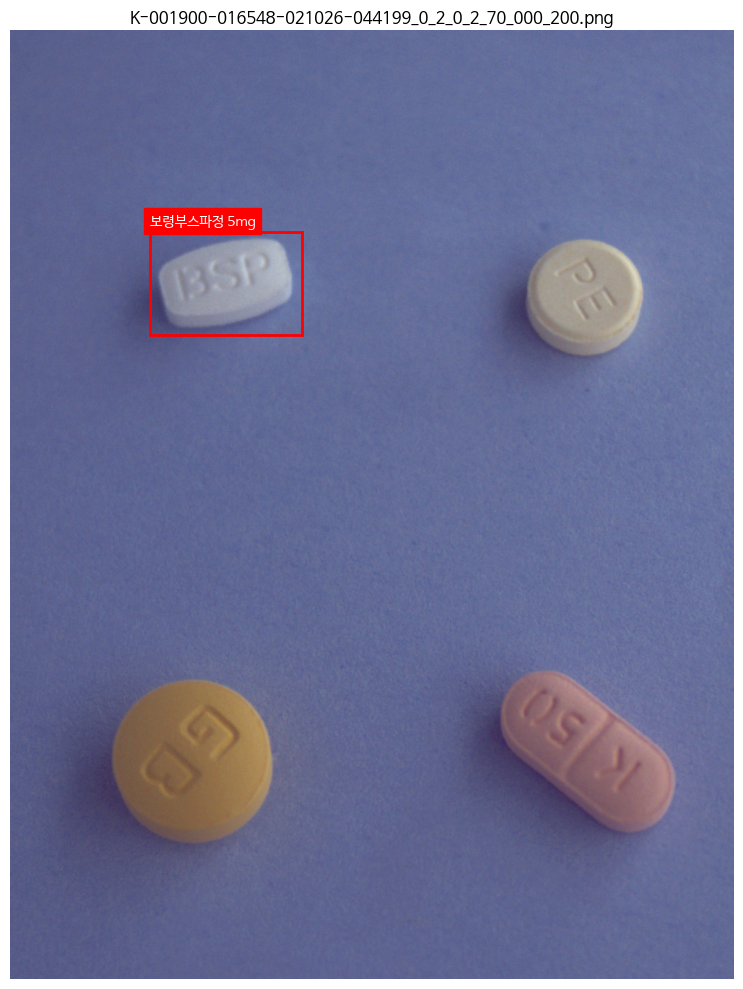

In [ ]:
# zip파일 시각화 (랜덤 이미지 + bbox 표시)
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# COCO JSON 파일 불러오기
with open('train_merge_coco.json', 'r', encoding='utf-8') as f:
    coco = json.load(f)

# categories 맵핑 (id → name)
id_to_name = {cat['id']: cat['name'] for cat in coco['categories']}

# 랜덤 이미지 선택
image_info = random.choice(coco['images'])
image_id = image_info['id']
file_name = image_info['file_name']
image_path = os.path.join(image_dir, file_name)

# 이미지 열기
image = Image.open(image_path)

# 해당 이미지의 annotation 추출
annotations = [ann for ann in coco['annotations'] if ann['image_id'] == image_id]

# 시각화
fig, ax = plt.subplots(1, figsize=(8, 10))
ax.imshow(image)
ax.set_title(file_name)

for ann in annotations:
    x, y, w, h = ann['bbox']
    label = id_to_name.get(ann['category_id'], "unknown")
    rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect)
    ax.text(x, y - 10, label, fontsize=10, color='white', backgroundcolor='red')

plt.axis('off')
plt.tight_layout()
plt.show()


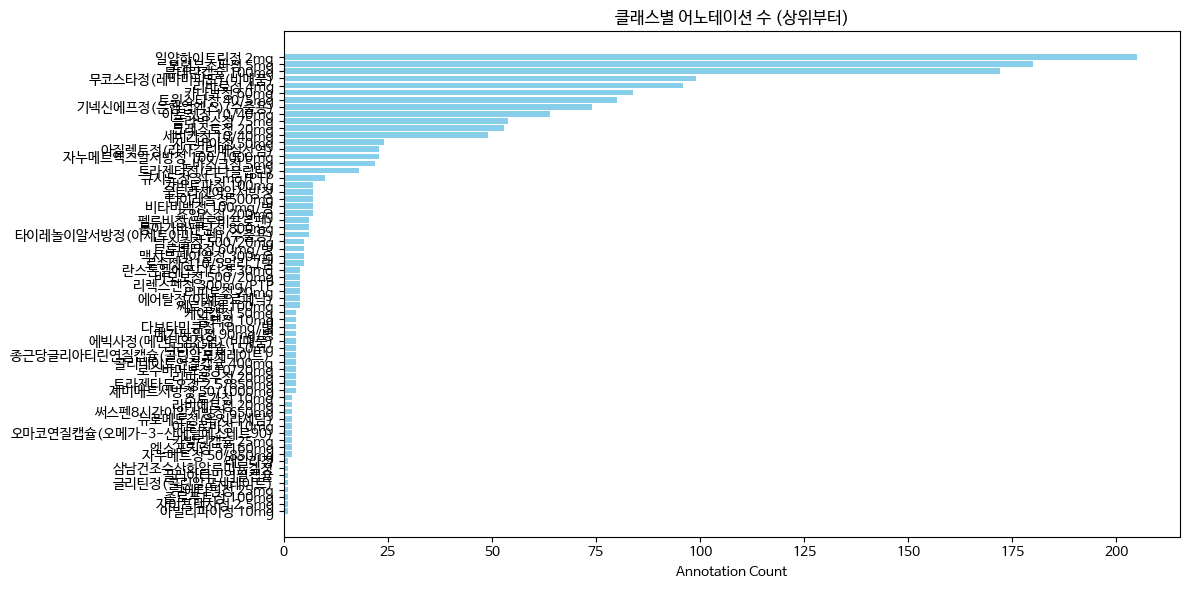

In [ ]:
# 클래스 분포 카운트 & 시각화 (bar plot으로)
from collections import Counter
import matplotlib.pyplot as plt

# 클래스 ID → 이름
id_to_name = {cat['id']: cat['name'] for cat in coco['categories']}

# 어노테이션에서 category_id만 추출
category_ids = [ann['category_id'] for ann in coco['annotations']]

# 카운트
category_counts = Counter(category_ids)

# 이름 기준으로 변환
labels = [id_to_name[cat_id] for cat_id in category_counts.keys()]
counts = list(category_counts.values())

# 정렬
sorted_pairs = sorted(zip(labels, counts), key=lambda x: x[1], reverse=True)
sorted_labels, sorted_counts = zip(*sorted_pairs)

# 시각화
plt.figure(figsize=(12, 6))
plt.barh(sorted_labels, sorted_counts, color='skyblue')
plt.xlabel("Annotation Count")
plt.title("클래스별 어노테이션 수 (상위부터)")
plt.gca().invert_yaxis()  # 가장 많은 클래스가 위로 오게
plt.tight_layout()
plt.show()

In [ ]:
# annotation 없는 배경 이미지 시각화
#(annotation 아예 없는 이미지나, 랜덤으로 하나 시각화, bbox 없음)

import json
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# COCO 파일 불러오기
with open('train_merge_coco.json', 'r', encoding='utf-8') as f:
    coco = json.load(f)

# image_id별 어노테이션 수 계산
annotated_image_ids = {ann['image_id'] for ann in coco['annotations']}
all_image_ids = {img['id'] for img in coco['images']}
background_image_ids = all_image_ids - annotated_image_ids

# background 이미지 목록 추출
background_images = [img for img in coco['images'] if img['id'] in background_image_ids]

print(f"배경 이미지 수 (어노테이션 없음): {len(background_images)}")

# 랜덤으로 하나 선택
if background_images:
    random_bg = random.choice(background_images)
    file_name = random_bg['file_name']
    image_path = os.path.join(image_dir, file_name)

    # 이미지 열기 및 시각화
    image = Image.open(image_path)
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title(f"배경 이미지 (annotation 없음):\n{file_name}")
    plt.axis('off')
    plt.show()
else:
    print("어노테이션 없는 이미지가 없습니다.")

배경 이미지 수 (어노테이션 없음): 0
어노테이션 없는 이미지가 없습니다.


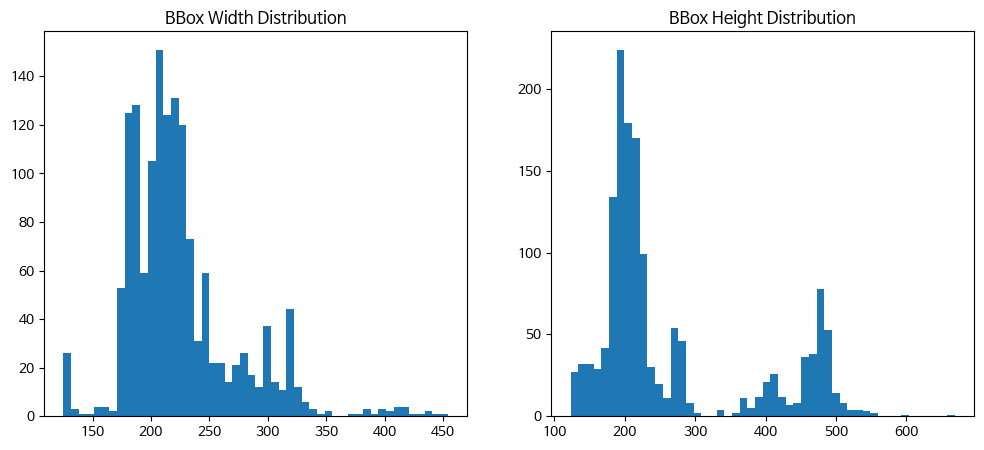

In [ ]:
# bounding  box width, height 구조 시각화

import matplotlib.pyplot as plt

widths = []
heights = []

for ann in coco['annotations']:
    x, y, w, h = ann['bbox']
    widths.append(w)
    heights.append(h)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(widths, bins=50)
plt.title("BBox Width Distribution")

plt.subplot(1, 2, 2)
plt.hist(heights, bins=50)
plt.title("BBox Height Distribution")

plt.show()


In [ ]:
import os

# JSON에 포함된 파일명 리스트 추출
json_filenames = [img['file_name'] for img in coco['images']]

# 실제 폴더 내 이미지 목록
actual_files = set(os.listdir('/content/train_images'))

# 누락된 파일 찾기
missing_files = [f for f in json_filenames if f not in actual_files]

print(f"실제 이미지가 존재하지 않는 파일 수: {len(missing_files)}")
for f in missing_files[:10]:  # 너무 많을 수 있으니 일부만 출력
    print(f" - {f}")

실제 이미지가 존재하지 않는 파일 수: 0


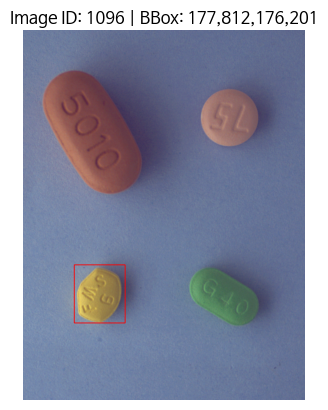

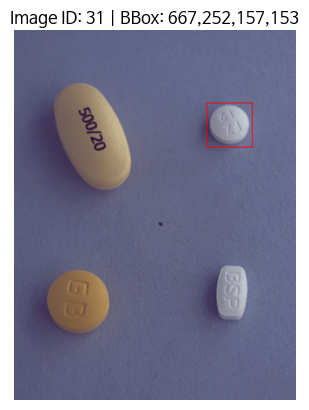

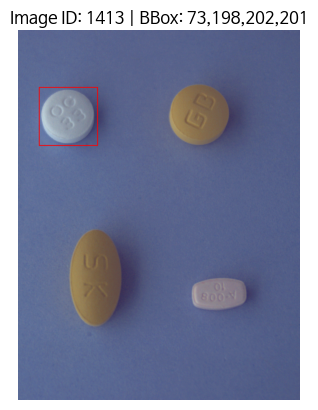

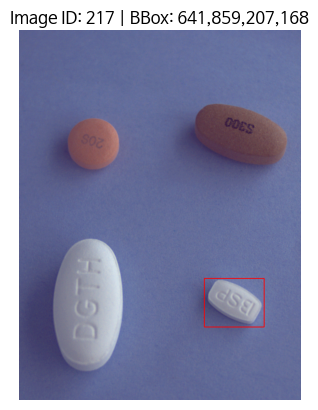

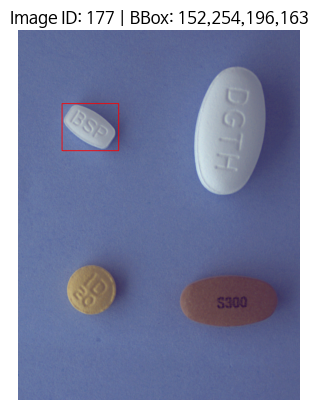

In [ ]:
import json
import random
import cv2
import matplotlib.pyplot as plt
import os

# COCO 병합 JSON 불러오기
with open('/content/train_merge_coco.json', 'r', encoding='utf-8') as f:
    coco = json.load(f)

# 이미지 ID 중 랜덤으로 5개 어노테이션 추출
sample_ann = random.sample(coco['annotations'], 5)

for ann in sample_ann:
    image_id = ann['image_id']

    # 해당 image_id에 맞는 image 정보 가져오기
    image_info = next((img for img in coco['images'] if img['id'] == image_id), None)

    if image_info is None:
        print(f"이미지 정보 없음: image_id = {image_id}")
        continue

    # 전체 경로 지정 (Kaggle 기준)
    image_path = os.path.join("/content/train_images", image_info['file_name'])

    # 이미지 불러오기
    img = cv2.imread(image_path)
    if img is None:
        print(f"이미지 로딩 실패: {image_path}")
        continue

    # 색상 변환 (BGR → RGB)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # bbox 정보 추출 및 시각화
    x, y, w, h = map(int, ann['bbox'])
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

    # 결과 출력
    plt.imshow(img)
    plt.title(f"Image ID: {image_id} | BBox: {x},{y},{w},{h}")
    plt.axis('off')
    plt.show()


In [ ]:
# 어노테이션 올림차순으로 집계

from collections import Counter

# 1. 카테고리별 어노테이션 수 집계
category_counter = Counter()
for ann in coco['annotations']:
    category_counter[ann['category_id']] += 1

# 2. 개수 적은 순으로 정렬
sorted_categories = sorted(category_counter.items(), key=lambda x: x[1])

# 3. 출력
print("어노테이션 수가 적은 순서대로 정렬:")
for cat_id, count in sorted_categories:
    print(f"Class {cat_id}: {count}개")


어노테이션 수가 적은 순서대로 정렬:
Class 4: 1개
Class 15: 1개
Class 69: 1개
Class 29: 1개
Class 64: 1개
Class 72: 1개
Class 73: 1개
Class 71: 1개
Class 42: 2개
Class 18: 2개
Class 58: 2개
Class 60: 2개
Class 1: 2개
Class 51: 2개
Class 23: 2개
Class 32: 2개
Class 49: 2개
Class 55: 3개
Class 6: 3개
Class 63: 3개
Class 67: 3개
Class 52: 3개
Class 50: 3개
Class 65: 3개
Class 47: 3개
Class 61: 3개
Class 28: 3개
Class 30: 3개
Class 35: 3개
Class 10: 4개
Class 48: 4개
Class 66: 4개
Class 22: 4개
Class 12: 4개
Class 11: 4개
Class 46: 5개
Class 53: 5개
Class 57: 5개
Class 31: 5개
Class 19: 6개
Class 9: 6개
Class 16: 6개
Class 5: 7개
Class 43: 7개
Class 34: 7개
Class 59: 7개
Class 21: 7개
Class 38: 10개
Class 56: 18개
Class 70: 22개
Class 3: 23개
Class 41: 23개
Class 25: 24개
Class 27: 49개
Class 26: 53개
Class 40: 54개
Class 45: 64개
Class 24: 74개
Class 36: 80개
Class 44: 84개
Class 37: 96개
Class 13: 99개
Class 17: 172개
Class 7: 180개
Class 2: 205개


- 다음과 같은 클래스들은 **어노테이션 수가 5개 이하**:

```

Class 5, 10, 14, 23, 26, 27, 33, 34, 36, 37, 38, 40, 41, 43, 44, 46, 47, 50, 52, 53, 56, 59, 60, 61, 64, 65, 68, 69, 70, 71, 74

```

→ **총 31개 클래스는 5개 이하로 등장** → 가짜일 확률 높음

# 학습용 데이터 구성

### ✅ YOLOv8 학습 준비 전체 구조

```

project_folder/
├── images/
│   ├── train/             ← 학습용 이미지들
│   └── val/               ← 검증용 이미지들
├── labels/
│   ├── train/             ← 학습 이미지에 대한 YOLO 포맷 라벨
│   └── val/               ← 검증 이미지에 대한 YOLO 포맷 라벨
├── train_merge_coco.json  ← 원본 COCO 포맷 (변환용)
└── data.yaml              ← YOLOv8 학습 설정 파일

```

### 1. COCO → YOLO 포맷 변환
- YOLOv8은 YOLO 라벨(txt) + data.yal만 있으면 학습 가능
- 변환 스크립트 짜기

#### 변환 스크립트 (COCO JSON  →YOLO txt) + .yaml 파일 생성 및 라벨폴더 생성

In [ ]:
import os
import json
import random
import shutil
from tqdm import tqdm

# -------------------- 사용자 설정 --------------------
coco_json_path = "train_merge_coco.json"  # COCO JSON 경로
image_src_dir = "train_images"              # 원본 이미지가 모여있는 경로 (수정됨)
image_train_dir = "images/train"          # 나눌 train 이미지 경로
image_val_dir = "images/val"              # 나눌 val 이미지 경로
label_train_dir = "labels/train"          # YOLO 라벨 저장 (train)
label_val_dir = "labels/val"              # YOLO 라벨 저장 (val)
yaml_path = "data.yaml"                   # data.yaml 저장 위치
split_ratio = 0.8                         # train:val = 8:2
# ---------------------------------------------------

# 폴더 생성
os.makedirs(image_train_dir, exist_ok=True)
os.makedirs(image_val_dir, exist_ok=True)
os.makedirs(label_train_dir, exist_ok=True)
os.makedirs(label_val_dir, exist_ok=True)

# COCO JSON 로드
with open(coco_json_path, 'r', encoding='utf-8') as f:
    coco = json.load(f)

# 클래스 정보 추출
categories = coco['categories']
category_id_to_name = {cat['id']: cat['name'] for cat in categories}
category_id_to_index = {cat['id']: idx for idx, cat in enumerate(categories)}
class_names = [cat['name'] for cat in categories]

# 이미지 정보
id_to_filename = {img['id']: img['file_name'] for img in coco['images']}
id_to_size = {img['id']: (img['width'], img['height']) for img in coco['images']}

# 어노테이션 그룹화
image_to_annotations = {}
for ann in coco['annotations']:
    image_to_annotations.setdefault(ann['image_id'], []).append(ann)

# 이미지 리스트 셔플 및 분할
image_ids = list(id_to_filename.keys())
random.shuffle(image_ids)
split_idx = int(len(image_ids) * split_ratio)
train_ids = set(image_ids[:split_idx])
val_ids = set(image_ids[split_idx:])

# YOLO txt 생성 및 이미지/라벨 복사
for image_id in tqdm(image_ids):
    file_name = id_to_filename[image_id]
    width, height = id_to_size[image_id]
    anns = image_to_annotations.get(image_id, [])
    yolo_lines = []

    for ann in anns:
        cat_id = ann['category_id']
        # category_id를 0부터 시작하는 class_idx로 변환 (COCO category ID와 YOLO class index 매핑)
        if cat_id not in category_id_to_index:
             print(f"[WARNING] category_id {cat_id} not found in category_id_to_index mapping for image {file_name}. Skipping annotation.")
             continue
        class_idx = category_id_to_index[cat_id]
        x, y, w, h = ann['bbox']
        x_c = (x + w / 2) / width
        y_c = (y + h / 2) / height
        w /= width
        h /= height
        yolo_lines.append(f"{class_idx} {x_c:.6f} {y_c:.6f} {w:.6f} {h:.6f}")

    txt_name = os.path.splitext(file_name)[0] + ".txt"

    # 어디로 보낼지 결정
    if image_id in train_ids:
        img_dst = os.path.join(image_train_dir, file_name)
        label_dst = os.path.join(label_train_dir, txt_name)
    else:
        img_dst = os.path.join(image_val_dir, file_name)
        label_dst = os.path.join(label_val_dir, txt_name)

    # 이미지 복사
    src_img_path = os.path.join(image_src_dir, file_name)
    # 파일 존재 여부 추가 확인
    if not os.path.exists(src_img_path):
        print(f"[WARNING] 이미지 파일이 존재하지 않습니다: {src_img_path}. 해당 이미지의 라벨 생성 및 복사를 건너뜁니다.")
        continue # 파일이 없으면 이 이미지에 대한 처리를 건너뜀

    shutil.copy2(src_img_path, img_dst)

    # 라벨 저장
    # 해당 이미지에 대한 어노테이션이 있을 경우에만 라벨 파일을 생성
    if yolo_lines:
        with open(label_dst, "w") as f:
            f.write("\n".join(yolo_lines))
    else:
         # 어노테이션이 없는 이미지에 대한 라벨 파일은 생성하지 않거나 비워둠
         # YOLOv8은 어노테이션 파일이 없는 이미지를 배경 이미지로 처리할 수 있음.
         pass # 여기서는 라벨 파일 생성을 건너뜀

100%|██████████| 1489/1489 [00:16<00:00, 92.48it/s]


In [ ]:
# data.yaml 생성
# data.yaml 파일의 경로는 /content/ 기준으로 설정함
yaml_content = f"""path: /content/
train: images/train
val: images/val
test: test_images
nc: {len(class_names)}
names: {class_names}
"""

with open(yaml_path, 'w') as f:
    f.write(yaml_content)

# 최종 출력
print("\n COCO → YOLO 변환 완료!")
print(f"클래스 개수 (nc): {len(class_names)}")
print(f"클래스 목록: {class_names}")
print(f"Train 이미지 수: {len(train_ids)}개")
print(f"Val 이미지 수: {len(val_ids)}개")
print(f"data.yaml 생성 위치: {yaml_path}")


 COCO → YOLO 변환 완료!
클래스 개수 (nc): 73
클래스 목록: ['아토르바정 10mg', '일양하이트린정 2mg', '아질렉트정(라사길린메실산염)', '레일라정', '가바토파정 100mg', '놀텍정 10mg', '보령부스파정 5mg', '신바로정', '동아가바펜틴정 800mg', '란스톤엘에프디티정 30mg', '쎄로켈정 100mg', '에어탈정(아세클로페낙)', '무코스타정(레바미피드)(비매품)', '삐콤씨에프정 618.6mg/병', '삼남건조수산화알루미늄겔정', '타이레놀이알서방정(아세트아미노펜)(수출용)', '뮤테란캡슐 100mg', '라비에트정 20mg', '펠루비정(펠루비프로펜)', '브린텔릭스정 20mg', '조인스정 200mg', '리피토정 20mg', '카발린캡슐 25mg', '기넥신에프정(은행엽엑스)(수출용)', '자누비아정 50mg', '크레스토정 20mg', '세비카정 10/40mg', '리피로우정 20mg', '글리틴정(콜린알포세레이트)', '트라젠타듀오정 2.5/850mg', '로수젯정10/5밀리그램', '엑스포지정 5/160mg', '알드린정', '타이레놀정500mg', '제미메트서방정 50/1000mg', '트윈스타정 40/5mg', '리바로정 4mg', '큐시드정 31.5mg/PTP', '아모잘탄정 5/100mg', '플라빅스정 75mg', '자누메트엑스알서방정 100/1000mg', '스토가정 10mg', '울트라셋이알서방정', '카나브정 60mg', '아토젯정 10/40mg', '낙소졸정 500/20mg', '콜리네이트연질캡슐 400mg', '비모보정 500/20mg', '자누메트정 50/850mg', '리리카캡슐 150mg', '오마코연질캡슐(오메가-3-산에틸에스테르90)', '에빅사정(메만틴염산염)(비매품)', '트루비타정 60mg/병', '렉사프로정 15mg', '케이캡정 50mg', '트라젠타정(리나글립틴)', '맥시부펜이알정 300mg', '써스펜8시간이알서방정 650mg', '비타비백정 100mg/

##### 2번째 수정: validation은 안 만든 코드

In [ ]:
# import os
# import json
# from tqdm import tqdm

# # ---------------------- 사용자 설정 ----------------------
# coco_json_path = "train_merge_coco.json"  # COCO 형식 JSON 경로
# image_root = "images/train"               # 이미지 폴더 경로
# output_label_dir = "labels/train"         # YOLO 라벨(txt) 저장 경로
# # --------------------------------------------------------

# # YOLO 라벨 폴더 만들기
# os.makedirs(output_label_dir, exist_ok=True)

# # COCO JSON 읽기
# with open(coco_json_path, 'r', encoding='utf-8') as f:
#     coco = json.load(f)

# # 이미지 ID -> 파일명 및 크기 매핑
# id_to_filename = {img['id']: img['file_name'] for img in coco['images']}
# id_to_size = {img['id']: (img['width'], img['height']) for img in coco['images']}

# # category_id -> YOLO class index (0부터 시작)
# category_mapping = {cat['id']: idx for idx, cat in enumerate(coco['categories'])}

# # 이미지 ID별 어노테이션 모으기
# image_to_annotations = {}
# for ann in coco['annotations']:
#     image_id = ann['image_id']
#     image_to_annotations.setdefault(image_id, []).append(ann)

# # 변환 시작
# for image_id, file_name in tqdm(id_to_filename.items()):
#     w, h = id_to_size[image_id]
#     label_lines = []

#     for ann in image_to_annotations.get(image_id, []):
#         cat_id = category_mapping[ann['category_id']]
#         x, y, width, height = ann['bbox']

#         # 중심 좌표 및 정규화
#         x_center = (x + width / 2) / w
#         y_center = (y + height / 2) / h
#         width /= w
#         height /= h

#         line = f"{cat_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}"
#         label_lines.append(line)

#     # YOLO 라벨 파일 저장
#     txt_name = os.path.splitext(file_name)[0] + ".txt"
#     txt_path = os.path.join(output_label_dir, txt_name)
#     with open(txt_path, "w") as f:
#         f.write("\n".join(label_lines))


##### 초기코드 : validation 따로 안만듦

In [ ]:
# # 파일 경로 설정
# coco_json_path = "train_merge_coco.json"        # COCO 형식의 주석 파일(.json)의 경로
# output_label_dir = 'labels/train_images'               # 변환된 YOLO 라벨 (.txt) 파일을 저장할 폴더 경로
# image_root = 'train_images'                     # 실제 이미지들이 들어있는 폴더 경로

# # 라벨 저장 폴더 생성
# os.makedirs(output_label_dir, exist_ok=True)     # labels/trian 이라는 폴더라 없으면 만들어줌
#                                                 # exist_ok=True : 이미 폴더가 있어도 에러 안나게 함

# # COCO JSON 불러오기
# with open(coco_json_path, 'r', encoding='utf-8') as f:      # train_merge_coco.json(COCO 주석 파일)을 열어서 파이썬 딕셔너리 형태로 읽음
#     coco = json.load(f)                         # coco라는 변수에 전체 데이터 저장


# # 이미지 ID -> 파일명 매핑
# id_to_filename = {img['id']: img['file_name'] for img in coco['images']}    # 이미지 고유 ID에 대응되는 파일명을 딕셔너리로 저장
#                                                                         # e.g. {103: 'image1.png', 104: 'image2.png'}
# id_to_size = {img['id']: (img['width'], img['height']) for img in coco['images']}   # 각 이미지 ID에 대응되는 너비/높이 크기 저장
#                                                                         # e.g. {103: (1080, 976)}
#                                                                         # 나중에 YOLO 포맷은 상대 좌표로 바꿔야 하므로 이미지 크기가 필요


# # category_id -> 0부터 시작하는 YOLO용 ID 만들기
# category_mapping = {}
# for i, cat in enumerate(coco['categories']):
#     category_mapping[cat['id']] = i         # YOLO class index는 0부터 시작
# # coco는 클래스 ID가 막 섞여 있을 수 있기 때문에 yolo는 0부터 차례대로 클래스 인덱스를 만들어야 함
# # e.g. coco에서 category_id = 42 --> yolo에선 0


# # 이미지별 어노테이션 그룹핑
# image_to_annotations = {}
# for ann in coco['annotations']:         # annotations : 한 이미지 안에 여러 개의 객체 정보가 들어있음
#     image_id = ann['image_id']          # 어느 이미지에 해당하는 annotation인지
#     image_to_annotations.setdefault(image_id, []).append(ann)
# # 각 이미지 ID마다 어떤 객체들이 있는지 모아서 저장
# # e.g. image_id = 103 : 사람, 약, 병이 있을 수 있음
# # --> [ann1, ann2, ann3] 식으로 저장됨


# # 변환 시작
# for image_id, file_name in tqdm(id_to_filename.items()):        # 전체 이미지 하나하나 반복해서 변환 시작
#                                                             # tqdm : 진행 상태를 보여주는 바(e.g. 10/100)
#     w, h = id_to_size[image_id]         # 이 이미지의 크기 (w, h) 가져오기
#     label_lines = []                    # YOLO 형식의 라벨을 담을 리스트 초기화(YOLO txt 한 줄씩 저장할 리스트를 초기화)

#     for ann in image_to_annotations.get(image_id, []):  # 이 이미지에 포함된 모든 객체(annotation)을 하나씩 반복
#         cat_id = category_mapping[ann['category_id']]   #  YOLO에 맞게 변환된 클래스 ID
#                                                         # COCO의 category ID --> YOLO의 ID로 바꿔줌(0부터 시작)
#         x, y, width, height = ann['bbox']       # COCO는 좌상돤 기준(x, y, 너비, 높이)
#                                                 # COCO에서 각 객체의 위치는 (왼쪽 위 x, y, 너비, 높이) 형식으로 되어 있음

#         # COCO는 (좌상담 x, y, w, h)
#         # YOLO는 (중심 x, y, w, h) -> 정규화
#         x_center = (x + width / 2) / w
#         y_center = (y + height / 2) / h
#         width /= w
#         height /= h
#         # yolo는 중심좌표 기준이라서 변환이 필요
#         # yolo는 0~1 사이 비율이기 때문에 전체 이미지 크기로 나눠줌


#         line = f"{cat_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}"
#         label_lines.append(line)
#         # YOLO 라벨 한 줄 만들기
#         # 형식 : 클래스 ID 중심 x, 중심 y, W, H

#     # 저장할 txt 파일 경로
#     txt_filename = os.path.splitext(file_name)[0] + '.txt'
#     # 이미지 파일명에서 .png 제거하고 .txt.로 바꿈
#     txt_path = os.path.join(output_label_dir, txt_filename)
#     # labels/train/ 폴더 아래에 저장 경로 생성

#     # txt 저장
#     with open(txt_path, 'w') as f:
#         f.write('\n'.join(label_lines))
#     # YOLO 라벨(txt 파일)을 실제로 저장

## 취소!! (2. data.yaml 별도 생성)
상단에서 train/val 분할과 data.yaml 생성을 동시에 진행

#### # train_merge_coo.json에서 클래스 이름 73개 추출

In [ ]:
# import json

# # COCO json 열기
# with open('train_merge_coco.json', 'r', encoding='utf-8') as f:
#     coco = json.load(f)



# # 카테고리 이름만 추출
# category_names = [cat['name'] for cat in coco['categories']]

# # 출력
# print("nc:", len(category_names))
# print("names:", category_names)

#### data.yaml 파일 생성

In [ ]:
# import yaml
# import os

# # YOLO 캐시 삭제
# print("YOLO 캐시 삭제 중...")
# cache_file = '/content/train_images.cache'
# if os.path.exists(cache_file):
#     os.remove(cache_file)
#     print(f"캐시 파일 삭제 완료: {cache_file}")
# else:
#     print("삭제할 캐시 파일이 없습니다.")


# # 클래스 이름 리스트
# class_names = ['비모보정 500/20mg', '무코스타정(레바미피드)(비매품)', '쎄로켈정 100mg', '가바토파정 100mg', '보령부스파정 5mg', '신바로정', '케이캡정 50mg', '동아가바펜틴정 800mg', '일양하이트린정 2mg', '아질렉트정(라사길린메실산염)', '로수바미브정 10/20mg', '삼남건조수산화알루미늄겔정', '맥시부펜이알정 300mg', '비타비백정 100mg/병', '뮤테란캡슐 100mg', '엑스포지정 5/160mg', '리피토정 20mg', '트라젠타정(리나글립틴)', '기넥신에프정(은행엽엑스)(수출용)', '트윈스타정 40/5mg', '자누메트엑스알서방정 100/1000mg', '크레스토정 20mg', '에빅사정(메만틴염산염)(비매품)', '울트라셋이알서방정', '에스원엠프정 20mg', '자누메트정 50/850mg', '카나브정 60mg', '로수젯정10/5밀리그램', '낙소졸정 500/20mg', '스토가정 10mg', '리바로정 4mg', '쿠에타핀정 25mg', '에어탈정(아세클로페낙)', '트루비타정 60mg/병', '써스펜8시간이알서방정 650mg', '펠루비정(펠루비프로펜)', '라비에트정 20mg', '제미메트서방정 50/1000mg', '세비카정 10/40mg', '트라젠타듀오정 2.5/850mg', '카발린캡슐 25mg', '아모잘탄정 5/100mg', '아토젯정 10/40mg', '오마코연질캡슐(오메가-3-산에틸에스테르90)', '다보타민큐정 10mg/병', '타이레놀정500mg', '큐시드정 31.5mg/PTP', '플라빅스정 75mg', '리렉스펜정 300mg/PTP', '삐콤씨에프정 618.6mg/병', '글리아타민연질캡슐', '종근당글리아티린연질캡슐(콜린알포세레이트)\xa0', '알드린정', '자누비아정 50mg', '리피로우정 20mg', '자이프렉사정 2.5mg', '노바스크정 5mg', '뉴로메드정(옥시라세탐)', '리리카캡슐 150mg', '아토르바정 10mg', '글리틴정(콜린알포세레이트)', '졸로푸트정 100mg', '놀텍정 10mg', '조인스정 200mg', '콜리네이트연질캡슐 400mg', '타이레놀이알서방정(아세트아미노펜)(수출용)', '브린텔릭스정 20mg', '아빌리파이정 10mg', '레일라정', '메가파워정 90mg/병', '렉사프로정 15mg', '란스톤엘에프디티정 30mg', '마도파정']

# # YAML 포맷으로 저장할 내용 구성
# data_yaml = {
#     'path' : '/content', # 이미지와 라벨 폴더의 상위 경로
#     'train' : 'train_images',  # train 이미지 폴더 (path 기준으로 상대 경로)
#     'val' : 'train_images',    # val 이미지 폴더 (path 기준으로 상대 경로)
#     'test' : 'test_images',
#     'nc' : len(class_names),
#     'names' : class_names,
# }

# # YAML 파일로 저장
# with open('data.yaml', 'w', encoding='utf-8') as f:
#     yaml.dump(data_yaml, f, allow_unicode=True)

# print("data.yaml 파일 생성 완료")



## 3. 학습 시작 (YOLOv8s)



In [ ]:
pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 71.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 142.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 136.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 72.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 132.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Unins

### 원래 내가 진행한 코드

In [ ]:
# from ultralytics import YOLO

model = YOLO("yolov8l.pt")
results = model.train(
    data="data.yaml",
    epochs=20,
    imgsz=640,
    batch=16,
    name="yolov8l-custom")
# # pre_result = model.predict(source='train_images', save=True)

Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8l-custom2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, pr

train: Scanning /content/labels/train... 1460 images, 0 backgrounds, 1 corrupt: 100%|██████████| 1460/1460 [00:19<00:00, 74.71it/s]

train: /content/images/train/K-003544-004543-012247-016551_0_2_0_2_70_000_200.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     7.0293]
train: New cache created: /content/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 120.7±7.7 MB/s, size: 1752.5 KB)


val: Scanning /content/labels/val... 727 images, 0 backgrounds, 0 corrupt: 100%|██████████| 727/727 [00:08<00:00, 86.02it/s]


val: New cache created: /content/labels/val.cache
Plotting labels to runs/detect/yolov8l-custom2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00013, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8l-custom2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      9.36G      1.486      6.033      1.577         31        640:   1%|          | 1/92 [00:02<03:25,  2.26s/it]


100%|██████████| 755k/755k [00:00<00:00, 20.4MB/s]
       1/20      9.44G     0.7561      4.327      1.142         10        640: 100%|██████████| 92/92 [01:24<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:24<00:00,  1.08s/it]


                   all        727        727      0.433      0.353      0.176      0.167

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      10.3G     0.4687      2.841     0.9388          7        640: 100%|██████████| 92/92 [01:20<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:24<00:00,  1.07s/it]


                   all        727        727      0.476      0.489      0.244      0.225

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      9.83G     0.4762      2.375     0.9515          3        640: 100%|██████████| 92/92 [01:19<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:24<00:00,  1.06s/it]


                   all        727        727      0.351      0.659       0.28      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      9.97G     0.4367      2.163      0.926          9        640: 100%|██████████| 92/92 [01:18<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:21<00:00,  1.06it/s]

                   all        727        727      0.319      0.613      0.299       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      10.3G     0.4317      1.973     0.9215          6        640: 100%|██████████| 92/92 [01:18<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:20<00:00,  1.11it/s]


                   all        727        727      0.328       0.62      0.299      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      9.97G     0.4069      1.891     0.9243          4        640: 100%|██████████| 92/92 [01:18<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:21<00:00,  1.07it/s]

                   all        727        727      0.326      0.623      0.292      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      9.97G     0.4014      1.765     0.9206          7        640: 100%|██████████| 92/92 [01:17<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:21<00:00,  1.09it/s]


                   all        727        727       0.34      0.637      0.298      0.289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      9.97G      0.379       1.67     0.8991          7        640: 100%|██████████| 92/92 [01:18<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:20<00:00,  1.11it/s]

                   all        727        727      0.274      0.784       0.33      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      9.97G     0.3757      1.649     0.9038          2        640: 100%|██████████| 92/92 [01:18<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:21<00:00,  1.07it/s]

                   all        727        727      0.275      0.759      0.301       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      10.3G     0.3704      1.596     0.8982          4        640: 100%|██████████| 92/92 [01:18<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:21<00:00,  1.07it/s]


                   all        727        727      0.305      0.764      0.322      0.313
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      9.97G     0.2848      1.508     0.8433          3        640: 100%|██████████| 92/92 [01:19<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:20<00:00,  1.14it/s]


                   all        727        727      0.305      0.791      0.343      0.332

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      10.3G     0.2727      1.457     0.8471          3        640: 100%|██████████| 92/92 [01:17<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:20<00:00,  1.14it/s]


                   all        727        727      0.278      0.842      0.347      0.334

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      10.3G     0.2613      1.421     0.8376          3        640: 100%|██████████| 92/92 [01:17<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:20<00:00,  1.13it/s]


                   all        727        727      0.284       0.87      0.343      0.335

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      9.96G     0.2484      1.361     0.8314          3        640: 100%|██████████| 92/92 [01:17<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:21<00:00,  1.09it/s]

                   all        727        727      0.263      0.881      0.334      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      9.97G     0.2414      1.336     0.8342          3        640: 100%|██████████| 92/92 [01:17<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:20<00:00,  1.14it/s]

                   all        727        727      0.277       0.88      0.342      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      9.97G     0.2323      1.315     0.8265          3        640: 100%|██████████| 92/92 [01:17<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:19<00:00,  1.16it/s]

                   all        727        727       0.27      0.889      0.332      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      9.96G     0.2184      1.284      0.813          3        640: 100%|██████████| 92/92 [01:18<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:20<00:00,  1.11it/s]

                   all        727        727      0.261      0.894      0.334      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      9.96G     0.2112      1.246     0.8192          3        640: 100%|██████████| 92/92 [01:17<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:19<00:00,  1.16it/s]

                   all        727        727      0.253      0.876      0.319      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      10.3G     0.2063      1.231     0.8192          3        640: 100%|██████████| 92/92 [01:17<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:19<00:00,  1.17it/s]


                   all        727        727      0.259      0.901      0.327      0.323

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      9.96G     0.1994        1.2     0.8102          3        640: 100%|██████████| 92/92 [01:17<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:20<00:00,  1.12it/s]


                   all        727        727      0.258      0.904      0.331      0.328

20 epochs completed in 0.627 hours.
Optimizer stripped from runs/detect/yolov8l-custom2/weights/last.pt, 87.7MB
Optimizer stripped from runs/detect/yolov8l-custom2/weights/best.pt, 87.7MB

Validating runs/detect/yolov8l-custom2/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 43,662,891 parameters, 0 gradients, 165.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:22<00:00,  1.04it/s]
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:496: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:496: UserWarning: Glyph 48148 (\N{HANGUL SYLLABLE BA}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:496: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:496: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:496: UserWarning: 

                   all        727        727      0.284       0.87      0.341      0.334
              리바로정 4mg         17         17      0.286      0.941      0.408      0.408
    기넥신에프정(은행엽엑스)(수출용)         71         71      0.234          1      0.242      0.237
 자누메트엑스알서방정 100/1000mg         11         11      0.224      0.909      0.263      0.256
             노바스크정 5mg         10         10      0.263        0.5      0.354      0.354
        자누메트정 50/850mg          9          9       0.18          1      0.211      0.211
             리피토정 20mg         23         23      0.313          1      0.381      0.381
         아모잘탄정 5/100mg          8          8      0.146          1      0.289      0.272
            자누비아정 50mg          8          8      0.131          1      0.258      0.258
            플라빅스정 75mg         20         20      0.323          1      0.413      0.413
         엑스포지정 5/160mg         10         10      0.225        0.9      0.344      0.344
            크레스토정 20m

##4. 모델 추론 테스트

In [ ]:
from ultralytics import YOLO

model = YOLO('/content/runs/detect/yolov8l-custom2/weights/best.pt')
results = model.predict(
    source='train_images',
    save=True
    )


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/1489 /content/train_images/K-001900-010224-016551-031705_0_2_0_2_70_000_200.png: 640x512 1 보령부스파정 5mg, 49.9ms
image 2/1489 /content/train_images/K-001900-010224-016551-031705_0_2_0_2_75_000_200.png: 640x512 1 보령부스파정 5mg, 47.1ms
image 3/1489 /content/train_images/K-001900-010224-016551-031705_0_2_0_2_90_000_200.png: 640x512 1 자누메트정 50/850mg, 1 낙소졸정 500/20mg, 1 보령부스파정 5mg, 47.1ms
image 4/1489 /content/train_images/K-001900-010224-016551-033009_0_

## 5. 시각화 확인

## 6. 예측결과 csv로 저장

### 1. 예측결과 csv로 저장

In [ ]:
import pandas as pd
import os

# 예측 결과 객체에서 박스 좌표 등 추출
all_predictions = []

for result in results:
    boxes = result.boxes
    names = result.names
    img_path = result.path

    for box in boxes:
        cls_id = int(box.cls.cpu().numpy()[0])            # 클래스 ID
        cls_name = names[cls_id]                          # 클래스 이름
        conf = float(box.conf.cpu().numpy()[0])           # 신뢰도
        x1, y1, x2, y2 = box.xyxy.cpu().numpy()[0]        # 좌표

        all_predictions.append({
            "image_path": img_path,
            "class_id": cls_id,
            "class_name": cls_name,
            "confidence": conf,
            "x1": x1,
            "y1": y1,
            "x2": x2,
            "y2": y2
        })

# CSV로 저장
df = pd.DataFrame(all_predictions)
csv_path = "/content/yolov8l_predictions.csv"
df.to_csv(csv_path, index=False)

print(f"예측 결과 저장 완료: {csv_path}")


예측 결과 저장 완료: /content/yolov8l_predictions.csv


### 2. 모델 성능 평가 지표 저장 :mAP, Precision, Recall 등 사용

In [ ]:
# metrics = model.val()

Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 144.8±33.7 MB/s, size: 1800.5 KB)


val: Scanning /content/labels/val.cache... 727 images, 0 backgrounds, 0 corrupt: 100%|██████████| 727/727 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:32<00:00,  1.41it/s]
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:496: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:496: UserWarning: Glyph 48148 (\N{HANGUL SYLLABLE BA}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:496: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:496: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.

                   all        727        727      0.284       0.87      0.343      0.335
              리바로정 4mg         17         17      0.286      0.941      0.411      0.411
    기넥신에프정(은행엽엑스)(수출용)         71         71      0.234          1       0.24      0.235
 자누메트엑스알서방정 100/1000mg         11         11      0.224      0.909       0.31      0.299
             노바스크정 5mg         10         10      0.261        0.5      0.361      0.359
        자누메트정 50/850mg          9          9       0.18          1      0.211      0.211
             리피토정 20mg         23         23      0.312          1      0.381      0.381
         아모잘탄정 5/100mg          8          8      0.146          1      0.282      0.274
            자누비아정 50mg          8          8      0.131          1       0.26       0.26
            플라빅스정 75mg         20         20      0.323          1      0.413      0.413
         엑스포지정 5/160mg         10         10      0.225        0.9      0.347      0.347
            크레스토정 20m

In [ ]:
# 성능지표 텍스트로 출력
# metrics 객체는 model.val() 실행 후에 생성됨
# 평균 Precision은 metrics.box.mp
# 평균 Recall은 metrics.box.mr로 접근해야 함

eval_result_text = f"""

=== 모델 성능 평가 결과 ===
mAP50 : {float(metrics.box.map50):.3f}
mAP75 : {float(metrics.box.map75):.3f}
mAP : {float(metrics.box.map):.3f}
Precision: {float(metrics.box.mp):.3f}
Recall: {float(metrics.box.mr):.3f}
box_f1 : {float(metrics.box.f1.mean()):.3f}
"""
# box_f1은 metrics.box.f1 속성으로 접근 가능
    # .mean()을 사용하여 평균값 계산


print(eval_result_text)



# 텍스트 파일로 저장
with open("/content/yolov8l_eval_metrics.txt", "w")as f:
    f.write(eval_result_text)

print("성능 평가 결과 저장 완료: /content/yolov8l_eval_metrics.txt")



=== 모델 성능 평가 결과 ===
mAP50 : 0.343
mAP75 : 0.341
mAP : 0.335
Precision: 0.284
Recall: 0.870
box_f1 : 0.356

성능 평가 결과 저장 완료: /content/yolov8l_eval_metrics.txt


# (개인)지표 해석

## ✅ 성능 지표 전체 해석

```
=== 모델 성능 평가 결과 ===
mAP50 : 0.343
mAP75 : 0.341
mAP : 0.335
Precision: 0.284
Recall: 0.870
box_f1 : 0.356

```



1. `mAP50 : 0.343`
    - mAP (mean Average Precision)은 **객체를 얼마나 정확히 탐지했는지 평가하는 지표**
    - `mAP50`은 **IOU(겹친 정도)가 50% 이상일 때의 평균 정밀도**
    - 비교적 **느슨한 기준에서 34.3%만 정확하게 탐지함**
2. `mAP75 : 0.341`
    - 이건 `mAP50`보다 **더 엄격한 기준**
    - IOU가 **75% 이상**이어야 "탐지 성공"
    - 34.1%로, `mAP50`과 거의 비슷
    - **탐지 박스 정밀도가 꽤 높은 편**
3. `mAP : 0.335`
    - = **mAP@[.5:.95]**
    - **IOU 0.50부터 0.95까지 다양한 수준에서 평균낸 값**
    - 33.5%
    - **전체적인 탐지 정확도는 아직 중간 이하 수준**
        
        → **일반적인 모델 비교 기준**으로 많이 사용.
        

---

1. `Precision : 0.284`
    - 모델이 **실제 객체인 것을 맞춘 비율**이 28.4%밖에 안 됨.
        
        →  **많이 잘못된 예측도 하고 있다**
        
    - **높일수록 오탐(false positive)을 줄일 수 있음.**
2. `Recall : 0.870`
    - 실제로 존재하는 객체들 중에서 **87.0%나 잘 찾아냄**.
    - **탐지 능력은 뛰어난데, 정확도는 낮다**
        
        → **놓치는 건 적지만, 잘못된 것도 많이 찾는 상태.**
        
3. `box_f1 : 0.356`
    - Precision과 Recall의 **균형 평가 지표**.
    - F1 점수는 둘 간의 **중간값을 강조**함
    - 35.6%는 전체적으로 보면 아직 개선 여지가 많음

---

## 결론 & 개선 필요점

- **객체를 놓치지 않고 많이 찾는 능력(Recall)은 좋음.**
- **하지만 정확도(Precision)는 낮아 오탐이 많음.**
- **전반적으로는 박스 정밀도와 F1 스코어가 낮아 추가적인 후처리, 데이터 정제 또는 모델 튜닝이 필요해 보임.**
- mAP 점수로는 **아직 실제 서비스에는 부족하고, 실험용이나 내부 테스트 수준**